# <center style = 'color : white'> CAN YOU RECEIVE A LOAN FROM THE BANK? </center>

# <center>**Data preprocessing**</center>

In [2]:
import pandas as pd
import numpy as np
#read the data file and assign each column its meaning
db = pd.read_csv("german.csv", names = ['status of existing checking account','Duration in months','Credit History','Purpose','Credit Amount','Savings account/bonds','Present employement since','installement rate in percentage of disposable income','Personal status and sex','Other debtors / guarantors','present residence since','Property','Age in years','Other installment plans', 'Housing', 'Number of existing credits at this bank', 'Job', 'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker', 'label'])
db.head() #show columns

,status of existing checking account,Duration in months,Credit History,Purpose,Credit Amount,Savings account/bonds,Present employement since,installement rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,label
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
db.info() #Discover the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   status of existing checking account                       1000 non-null   object
 1   Duration in months                                        1000 non-null   int64 
 2   Credit History                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit Amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employement since                                 1000 non-null   object
 7   installement rate in percentage of disposable income      1000 non-null   int64 
 8   Personal status and sex      

In [4]:
db.describe() #Statistical representation of data

,Duration in months,Credit Amount,installement rate in percentage of disposable income,present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [5]:
db.isnull().sum()  # check for incomplete data

status of existing checking account                         0
Duration in months                                          0
Credit History                                              0
Purpose                                                     0
Credit Amount                                               0
Savings account/bonds                                       0
Present employement since                                   0
installement rate in percentage of disposable income        0
Personal status and sex                                     0
Other debtors / guarantors                                  0
present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [6]:
db.duplicated().sum() #check for duplicate data

0

## <center> **Categorical Data Encoding** </center>

In [7]:
#Since there are some columns that represent qualitative values, we will encode these values so that the model can manipulate them

#P.S.: We could have used pre-defined methods like One-Hot encoding in scikit-learn, but we decided to do it manually


#encoding manually all categorical features :

db['Personal status and sex'] = db['Personal status and sex'].replace(['A93', 'A92', 'A91', 'A94'], [0, 1, 2, 3])
db['foreign worker'] = db['foreign worker'].replace(['A201', 'A202'], [1, 0])
db['Savings account/bonds'] = db['Savings account/bonds'].replace(['A61', 'A62', 'A63', 'A64', 'A65'], [1, 2, 3, 4, 0])
db['status of existing checking account'] = db['status of existing checking account'].replace(['A11', 'A12', 'A13', 'A14'], [1, 2, 3, 4])
db['Credit History'] = db['Credit History'].replace(['A30', 'A31', 'A32', 'A33', 'A34'], [0, 1, 2, 3, 4])
db['Purpose'] = db['Purpose'].replace(['A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A48', 'A49', 'A410'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
db['Present employement since'] = db['Present employement since'].replace(['A71', 'A72', 'A73', 'A74', 'A75'], [0, 1, 2, 3, 4])
db['Other debtors / guarantors'] = db['Other debtors / guarantors'].replace(['A101', 'A102', 'A103'], [0, 1, 2])
db['Property'] = db['Property'].replace(['A121', 'A122', 'A123', 'A124'], [0, 1, 2, 3])
db['Other installment plans'] = db['Other installment plans'].replace(['A141', 'A142', 'A143'], [0, 1, 2])
db['Housing'] = db['Housing'].replace(['A151', 'A152', 'A153'], [0, 1, 2])
db['Job'] = db['Job'].replace(['A171', 'A172', 'A173', 'A174'], [0, 1, 2, 3])
db['Telephone'] = db['Telephone'].replace(['A191', 'A192'], [0, 1])

In [8]:
x_raw = db[['status of existing checking account','Duration in months','Credit History','Purpose','Credit Amount','Savings account/bonds','Present employement since','installement rate in percentage of disposable income','Personal status and sex','Other debtors / guarantors','present residence since','Property','Age in years','Other installment plans', 'Housing', 'Number of existing credits at this bank', 'Job', 'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker']]
x_raw.shape

(1000, 20)

## <center>**Data visualization : Imbalanced Data**</center>

In [9]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


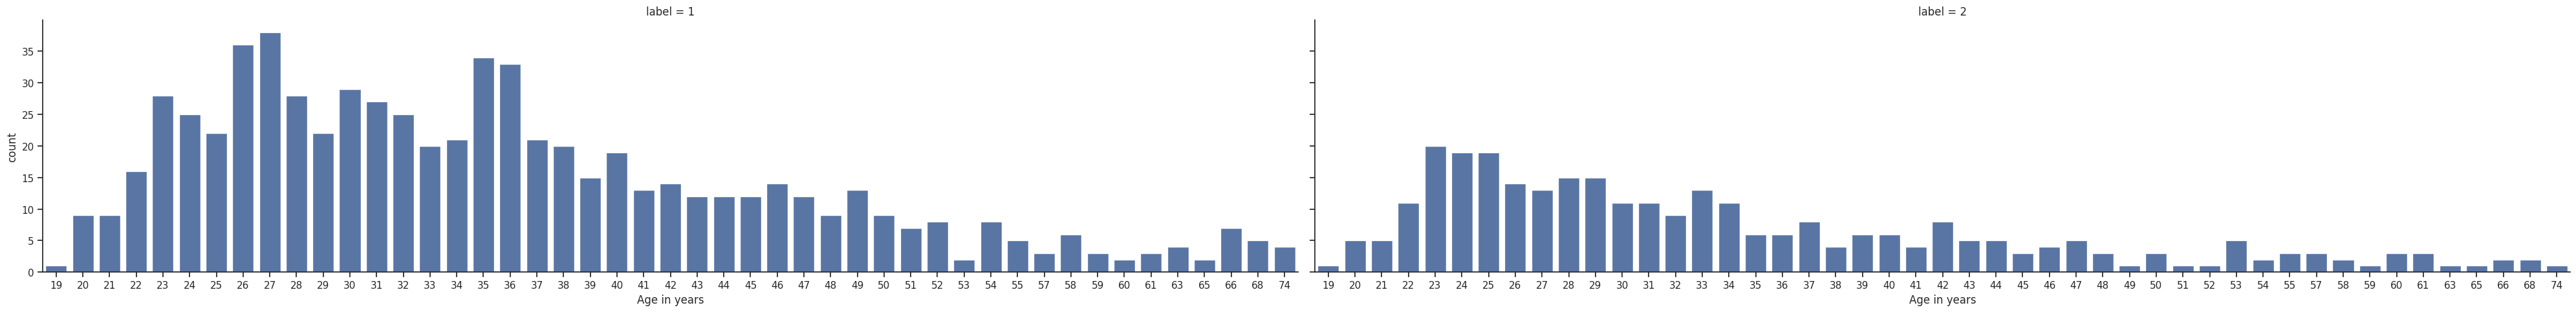

In [10]:
graph = sns.FacetGrid(db, col = 'label', aspect=4, height=5)
graph.map(sns.countplot, 'Age in years')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


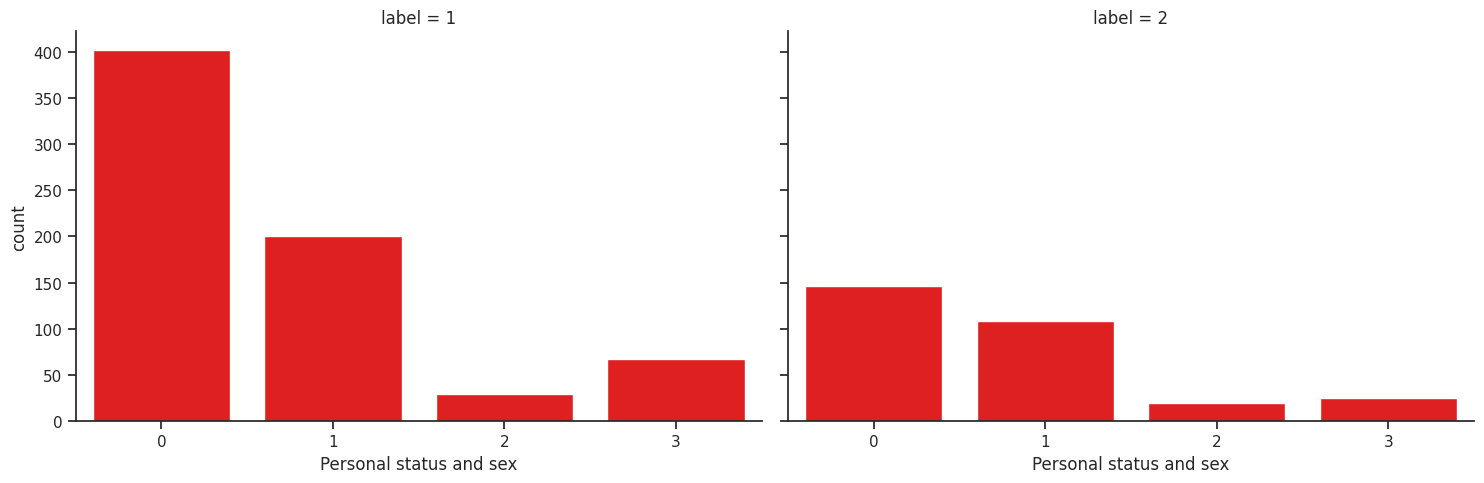

In [11]:
graph = sns.FacetGrid(db, col = 'label', aspect=1.5, height=5)
graph.map(sns.countplot, 'Personal status and sex', color = 'red')


<Axes: xlabel='Personal status and sex', ylabel='count'>

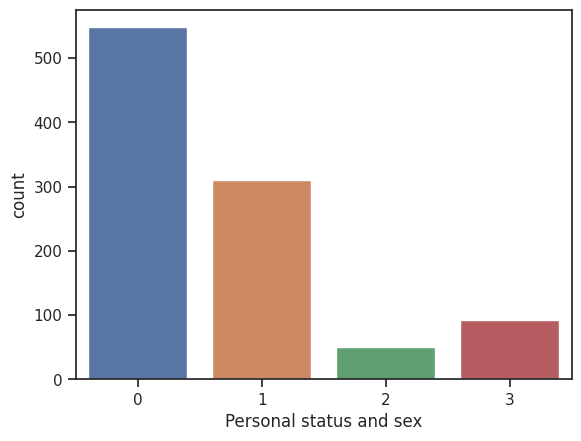

In [12]:
sns.countplot(x = 'Personal status and sex', data = db)

<Axes: xlabel='label', ylabel='count'>

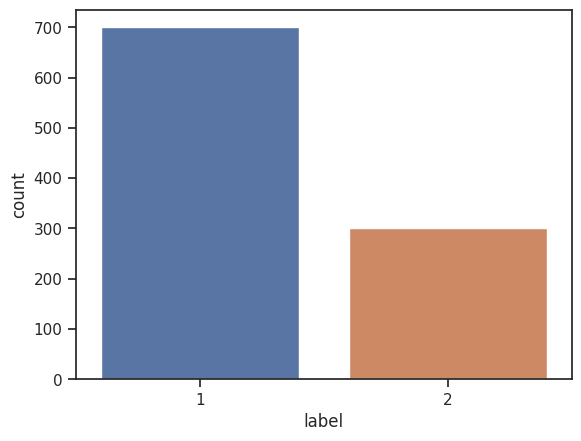

In [13]:
sns.countplot(x = 'label', data = db)

In [14]:
################# LogisticRegression with raw data with all features included ####################################
import statsmodels.api as sm
y = db['label']
y_bin = np.where(y == 2, 1, 0)
logit_model=sm.Logit(y_bin,x_raw)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.486410
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      980
Method:                           MLE   Df Model:                           19
Date:                Thu, 20 Jul 2023   Pseudo R-squ.:                  0.2037
Time:                        19:33:30   Log-Likelihood:                -486.41
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 5.147e-42
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
status of existi

#We will minimize the number of features by selecting only significant features based on their associated coefficients in the Logisic Regression Model


In [15]:
# print feature's name is its associated coefficient is larger than 0.1

features = x_raw.columns
coefficients = result.params

for feature, coef in zip(features, coefficients):
    if abs(coef) >= 0.1:
        print(feature + ": " + str(coef))

status of existing checking account: -0.6423465562306444
Credit History: -0.38769154271372863
Present employement since: -0.17497780913006095
installement rate in percentage of disposable income: 0.2620607904688589
Personal status and sex: 0.14936867736147233
Other debtors / guarantors: -0.3242710987796619
Property: 0.2077016508244726
Other installment plans: -0.3135868526474508
Housing: -0.27173032061313285
Number of existing credits at this bank: 0.2825353320288003
Telephone: -0.347426538334926
foreign worker: 1.023664554260294


In [16]:
#selecting only the significant features shown in the output above (feature engineering : fe)

x_fe = db[['status of existing checking account', 'Credit History', 'Present employement since', 'installement rate in percentage of disposable income', 'Personal status and sex', 'Other debtors / guarantors', 'Property', 'Other installment plans', 'Housing', 'Number of existing credits at this bank', 'Telephone','foreign worker']]


y = db['label']

#We show the modified data
x_fe.head()

,status of existing checking account,Credit History,Present employement since,installement rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Property,Other installment plans,Housing,Number of existing credits at this bank,Telephone,foreign worker
0,1,4,4,4,0,0,0,2,1,2,1,1
1,2,2,2,2,1,0,0,2,1,1,0,1
2,4,4,3,2,0,0,0,2,1,1,0,1
3,1,2,3,2,0,2,1,2,2,1,0,1
4,1,3,2,3,0,0,3,2,2,2,0,1


# <center>**Machine learning models : Imbalanced Data**</center>





# Construction of three ML models

In [17]:
from sklearn.linear_model import LogisticRegression #importation du modèle de la regression logistique
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
# We scale the values of the dataset to the intervalle [0,1]
# To achieve this we proceed by subtracting the minimum value of each feature and then dividing by the range

scaler = MinMaxScaler()
scaler.fit(x_raw)
x_raw_scaled = scaler.transform(x_raw)


In [19]:
# We split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_raw_scaled, y, train_size = 0.8, random_state = 50)

# Let's verify the shape of our train and test matrices
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 20)
(200, 20)
(800,)
(200,)


## 1st Three Models : LogisticReg + GaussianNBS + **SVC (Kernel : 'rbf')**

In [20]:

Three_Models_I = {
    'LogisticRegression' : LogisticRegression(random_state = 25),
    'GaussianNBS' : GaussianNB(),
    'SVC' : SVC(kernel='rbf', probability=False)
}


## Three Models : LogisticReg + GaussianNBS + **SVC (Kernel : 'poly')**

In [21]:

# We define the same 3 models, but this time SVC with kernel = poly

Three_Models_II = {
    'LogisticRegression' : LogisticRegression(random_state = 25),
    'GaussianNBS' : GaussianNB(),
    'SVC' : SVC(kernel='poly', probability=False)
}

## 3rd three Models : LogisticReg + GaussianNBS + **SVC (3rd Kernel 'precomputed')** (failed)

In [22]:
# We define the same 3 models, but this time SVC with kernel = precomputed
Three_Models_III  = {
    'LogisticRegression' : LogisticRegression(random_state = 25),
    'GaussianNBS' : GaussianNB(),
    'SVC' : SVC(kernel='precomputed', probability=False)
}

#Training & evaluation of the three Models

In [23]:
from sklearn.metrics import precision_score, recall_score , accuracy_score, confusion_matrix

def metrics(y_true, y_predict, retur = False):
    pre = precision_score(y_true, y_predict, average = 'macro')
    rec = recall_score(y_true, y_predict, average = 'macro')
    accuracy = accuracy_score(y_true, y_predict)
    if retur :
      return pre, rec, accuracy_score
    else:
      print('precision : ', pre)
      print('recall : ', rec)
      print('accuracy : ', accuracy)

In [24]:
def train_and_evaluate(models, x, y):
  for name, model in models.items():
    print(name, ':')
    model.fit(x,y)
    metrics(y, model.predict(x))
    print("-" * 30)

In [25]:
print('Three_Models_I')
print(' ')
train_and_evaluate(Three_Models_I,x_train, y_train)

print('=' * 30)
print(' ' )
print(' ' )

print('Three_Models_II')
print(' ' )
train_and_evaluate(Three_Models_II ,x_train, y_train)

print('=' * 30)
print(' ')
print(' ' )

print('Three_Models_III')
print(' ')
train_and_evaluate(Three_Models_III,x_train, y_train)

 #P.S.: the SVC model with 'precomputed' kernel didn't work because it requires the data x as a square matrix while we have the matrix'x' of size 800x11

Three_Models_I
 
LogisticRegression :
precision :  0.7186381729725383
recall :  0.6630130929094439
accuracy :  0.76125
------------------------------
GaussianNBS :
precision :  0.6998697916666667
recall :  0.7208782067135824
accuracy :  0.74125
------------------------------
SVC :
precision :  0.8232554200542005
recall :  0.728852365642167
accuracy :  0.82125
------------------------------
 
 
Three_Models_II
 
LogisticRegression :
precision :  0.7186381729725383
recall :  0.6630130929094439
accuracy :  0.76125
------------------------------
GaussianNBS :
precision :  0.6998697916666667
recall :  0.7208782067135824
accuracy :  0.74125
------------------------------
SVC :
precision :  0.8725625206566046
recall :  0.8041347213166355
accuracy :  0.86875
------------------------------
 
 
Three_Models_III
 
LogisticRegression :
precision :  0.7186381729725383
recall :  0.6630130929094439
accuracy :  0.76125
------------------------------
GaussianNBS :
precision :  0.6998697916666667
recall

ValueError: ignored

# <center> A **4th model** (Deep Learning)
#<center> **Artificial Neural Network (ANN) : Imbalanced Data**

In [26]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# We define the network architecture : 3 layers
# 64 neurons (first hidden layer), 32 neurons (2nd hidden layer), 1 neuron (output layer)
# we use 'sigmoid' activation function in the last layer in order to have a value in [0,1]

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train_scaled.shape[1])) #input_dim=X_train_scaled.shape[1] to flatten the data in 1D vector
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# # Training the model and storing in the variable 'history' for later visualization
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.3)

# Evaluate the model on the test set
x_test_scaled = scaler.transform(x_test)
score = model.evaluate(x_test_scaled, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
18/18 [==============================] - 1s 15ms/step - loss: 0.7613 - accuracy: 0.5071 - val_loss: 0.4947 - val_accuracy: 0.7167
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4683 - accuracy: 0.6893 - val_loss: 0.3401 - val_accuracy: 0.7375
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 0.3659 - accuracy: 0.6893 - val_loss: 0.2944 - val_accuracy: 0.7375
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 0.3353 - accuracy: 0.6893 - val_loss: 0.2784 - val_accuracy: 0.7375
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 0.3241 - accuracy: 0.6893 - val_loss: 0.2722 - val_accuracy: 0.7375
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 0.3191 - accuracy: 0.6893 - val_loss: 0.2692 - val_accuracy: 0.7375
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.3166 - accuracy: 0.6893 - val_loss: 0.2674 - val_accuracy: 0.7375
Epoch 8/50
18/18 [=

##Accuracy and loss visualization

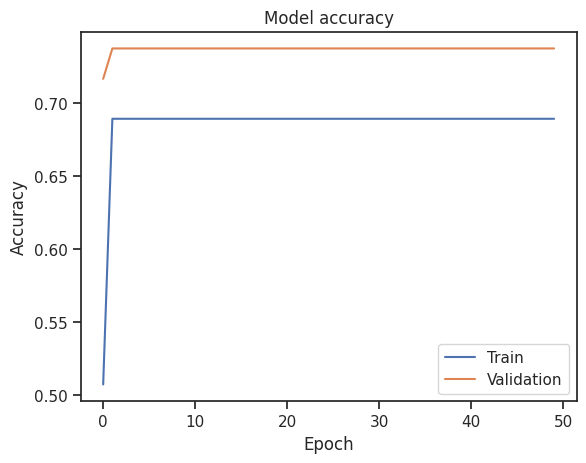

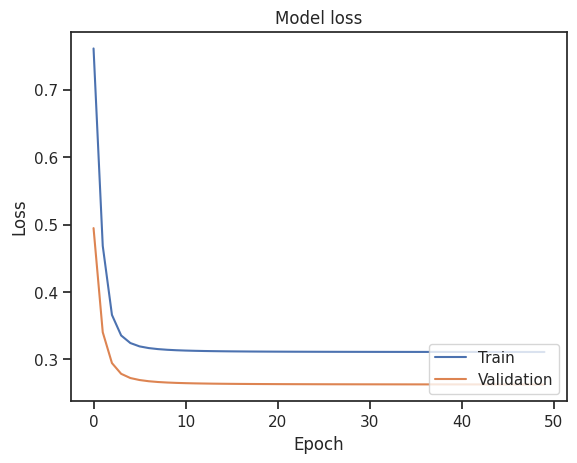

In [28]:
 import matplotlib.pyplot as plt
 #Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

The accuracy and loss graphs are showing that our model is a pretty much nonsense (because the loss is supposed to tend to zero but the graph above shows the opposite)

##  **Confusion Matrix : Imbalanced Data**

In [29]:
from sklearn.metrics import precision_score, recall_score

# Make predictions on the test set
y_pred_proba = model.predict(x_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int) # cette inegalité definit le seuil de la probabilité donnée qui permet de determiner la classe correspondante

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

7/7 [==============================] - 0s 2ms/step
Precision: 0.685
Recall: 1.0
[[137   0]
 [ 63   0]]


# <center>Going back to our **imbalanced** data

##  **Diverse UnderSampling Methods**



### ***1.   RandomUnderSampler***

In [30]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under_ru, y_under_ru = undersample.fit_resample(x_raw_scaled, y)



### ***2.    NearMiss***



In [31]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version = 2, n_neighbors=3)
X_under_nm, y_under_nm = undersample.fit_resample(x_raw_scaled, y)

### **3. Cluster Centroids**

In [33]:
from imblearn.under_sampling import ClusterCentroids
undersample = ClusterCentroids(sampling_strategy='auto')
X_under_cc, y_under_cc = undersample.fit_resample(x_raw_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##<center> **Data visualization : Balanced Data**

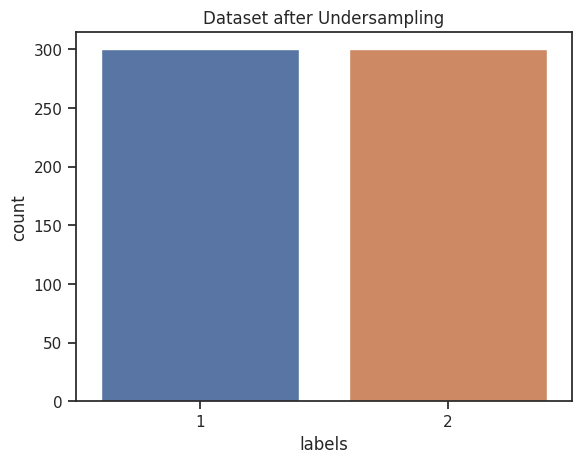

In [34]:
# Create a list of class labels
labels = ['1', '2']

# Combine the features and target into a single DataFrame
df = pd.DataFrame({'feature1': X_under_nm[:, 0], 'feature2': X_under_nm[:, 1], 'label': y_under_nm})

# Create a countplot using seaborn
sns.countplot(x='label', data=df)

# Set the labels and title of the plot
plt.xlabel('labels')
plt.ylabel('count')
plt.xticks([0, 1], labels)
plt.title('Dataset after Undersampling')
plt.show()

# <center> **Machine learning models : Balanced Data**  



# Training & Evaluation

In [35]:
# Nearmiss is reliable as far as the preservation of information is concerned
#therefore, from now on, we will be using Nearmiss undersampling method

print('Three_Models_I')
print(' ')
train_and_evaluate(Three_Models_I,X_under_nm, y_under_nm)

print('=' * 30)
print(' ' )
print(' ' )

print('Three_Models_II')
print(' ' )
train_and_evaluate(Three_Models_II ,X_under_nm, y_under_nm)
print('=' * 30)
print(' ')
print(' ' )

# From the output below, we can see that SVC in Three_Models_II (i.e. SVC with kernel = 'poly') is much better than SVC in Three_Models_I (i.e. SVC with kernel = 'rbf')

Three_Models_I
 
LogisticRegression :
precision :  0.746677630116894
recall :  0.7466666666666666
accuracy :  0.7466666666666667
------------------------------
GaussianNBS :
precision :  0.707641196013289
recall :  0.6
accuracy :  0.6
------------------------------
SVC :
precision :  0.8300146673185476
recall :  0.8300000000000001
accuracy :  0.83
------------------------------
 
 
Three_Models_II
 
LogisticRegression :
precision :  0.746677630116894
recall :  0.7466666666666666
accuracy :  0.7466666666666667
------------------------------
GaussianNBS :
precision :  0.707641196013289
recall :  0.6
accuracy :  0.6
------------------------------
SVC :
precision :  0.8554779203150903
recall :  0.855
accuracy :  0.855
------------------------------
 
 



# <center> **Artificial neural network (ANN) : Balanced Data**

In [37]:
# We split our new undersampled dataset into train and test

x_train_undersampled, x_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_under_nm, y_under_nm, train_size = 0.8, random_state = 50)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_undersampled)

# We define the network architecture : 3 layers
# 64 neurons (first hidden layer), 32 neurons (2nd hidden layer), 1 neuron (output layer)
# we use 'sigmoid' activation function in the last layer in order to have a value in [0,1]

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=x_train_scaled.shape[1])) #input_dim=X_train_scaled.shape[1] to flatten the data in 1D vector
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model and storing in the variable 'history' for later visualization
history = model.fit(x_train_scaled, y_under_nm, epochs=50, batch_size=32, validation_split=0.3)

# Evaluating the model on the test set
x_test_scaled = scaler.transform(x_test_undersampled)
score = model.evaluate(x_test_scaled,y_test_undersampled, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/50
11/11 [==============================] - 1s 23ms/step - loss: 0.5940 - accuracy: 0.6696 - val_loss: 0.1324 - val_accuracy: 0.0000e+00
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 0.4105 - accuracy: 0.8661 - val_loss: -0.3406 - val_accuracy: 0.0000e+00
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 0.2579 - accuracy: 0.8899 - val_loss: -0.7899 - val_accuracy: 0.0000e+00
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.1266 - accuracy: 0.8929 - val_loss: -1.2309 - val_accuracy: 0.0000e+00
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0109 - accuracy: 0.8929 - val_loss: -1.6735 - val_accuracy: 0.0000e+00
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: -0.0909 - accuracy: 0.8929 - val_loss: -2.1219 - val_accuracy: 0.0000e+00
Epoch 7/50
11/11 [==============================] - 0s 7ms/step - loss: -0.1812 - accuracy: 0.8929 - val_loss: -2.5830 - val_accu



P.S : Notice that the test accuracy to 46% when the training accuracy is approximately 77,6%, it is probably due to the fact that Neural Networks values a large dataset (even if it's imbalanced) more than a small dataset (even if it was balanced) . That lead to a phenomenon called overfitting.


##Accuracy and loss visualization

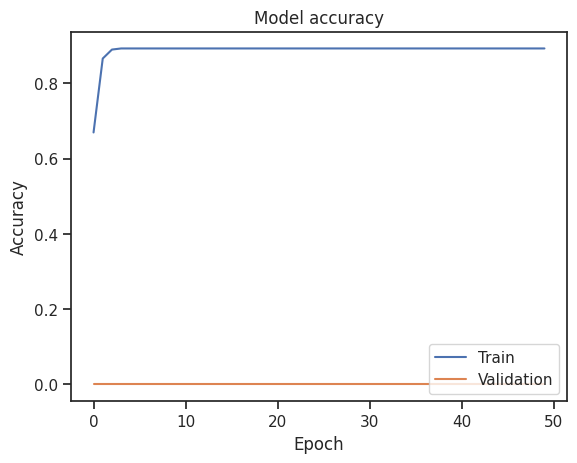

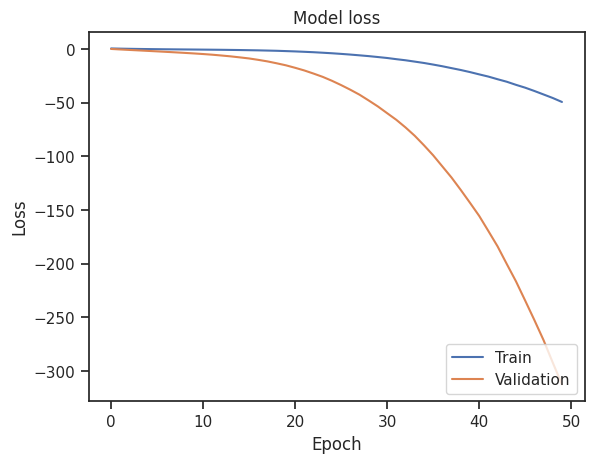

In [38]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

the accuracy and loss graphs are showing that our model is far from being good !! (even after undersampling)

##Confusion matrix : Balanced Data

In [39]:
from sklearn.metrics import precision_score, recall_score

# Make predictions on the test set
y_pred_proba = model.predict(x_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int) # this inequality defines the threshold of the given probability to determine the corresponding class
precision = precision_score(y_test_undersampled, y_pred)
recall = recall_score(y_test_undersampled, y_pred)

print('Precision:', precision)
print('Recall:', recall)

conf_matrix = confusion_matrix(y_test_undersampled, y_pred)

print(conf_matrix)

4/4 [==============================] - 0s 3ms/step
Precision: 0.4666666666666667
Recall: 1.0
[[56  0]
 [64  0]]
